            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
Epoch 1/100


c:\Github\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0622 - val_loss: 0.0120
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0114
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0111
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0105
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_lo

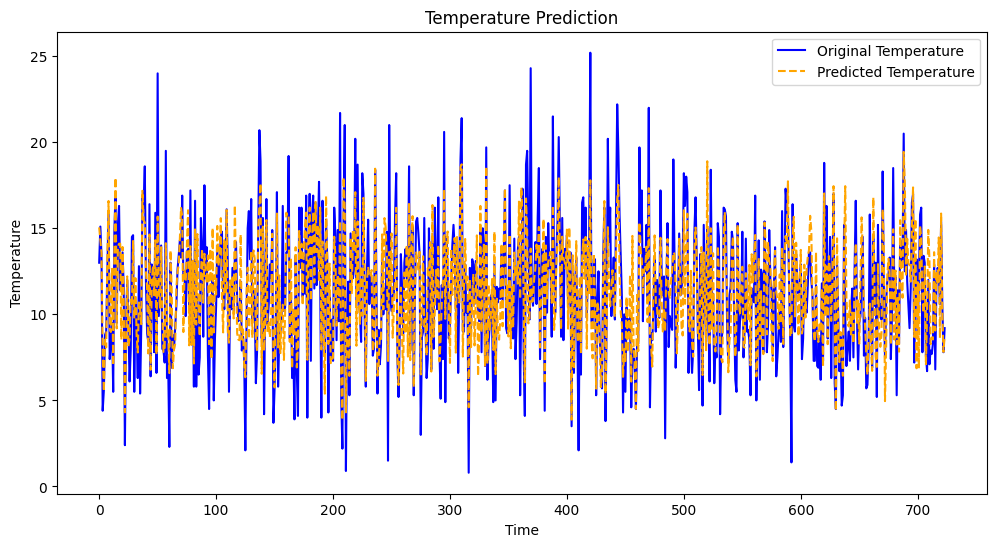

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the temperature dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(data.head())

#Step 2 : Normalize the data (MinMaxScaler for scaling between 0 and 1)
temperatures = data['Temp'].values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_temp = scaler.fit_transform(temperatures.reshape(-1,1))

# Step 3: Create sequences for training (X) and target (y)
def create_sequences(data, n_steps):
  X, y = [], []
  for i in range(len(data) - n_steps):
    X.append(data[i:i + n_steps])
    y.append(data[i + n_steps])
  return np.array(X), np.array(y)

n_steps = 30
X,y = create_sequences(scaled_temp,n_steps=n_steps)

#Step 4:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

X_train = X_train.reshape(X_train.shape[0],n_steps,1)
X_test = X_test.reshape(X_test.shape[0],n_steps,1)

#Step 5 : Build the LSTM model
model = Sequential([
    LSTM(50 , activation = 'tanh' , input_shape = (n_steps , 1)),
    Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 6: Train the model
history = model.fit(X_train , y_train , epochs=100 , batch_size = 32 , validation_split = 0.2)

#Step 7 : Evaluate the model
loss = model.evaluate(X_test , y_test)
print(f'Test Loss: {loss:.4f}')

#Step 8 : Make predictions and inverse transform the scaling
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

#Step 9: Plot the results
plt.figure(figsize=(12,6))
plt.plot(y_test_original, label = 'Original Temperature', color='blue')
plt.plot(y_pred_original, label='Predicted Temperature' , color='orange',linestyle = 'dashed')
plt.title("Temperature Prediction")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()